In [9]:
!pip install lasio
import lasio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
las = lasio.read("1055867986.las")

In [10]:
import os
print(os.listdir('.'))

['.config', '1055867986.las', 'sample_data']


In [11]:
df = las.df()
df.head()

,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,DCAL,DPOR,GR,LSPD,LTEN,RHOB,RHOC,RILD,RILM,RLL3,RXORT,SP,ABHV
DEPT,,,,,,,,,,,,,,,,,,,,
2395.0,0.0,0.0,369.9814,21.4360,29.9547,29.9547,32.4542,8.0031,7.5079,86.5311,-35.00,942.2137,2.5816,0.1392,2.7028,2.6477,2.5751,2.0920,-46.5,164.9767
2395.5,0.0,0.0,363.5545,23.9489,31.8881,31.8881,34.4576,7.9900,7.9083,80.4197,-34.87,951.3049,2.5748,0.0791,2.7506,2.7701,2.5751,2.7713,-46.5,164.8573
2396.0,0.0,0.0,362.5702,26.2625,33.3949,33.3949,36.0010,8.0013,13.3387,81.3643,-35.25,962.2547,2.4819,0.0601,2.7581,2.8389,2.5751,2.8470,-46.5,164.7384
2396.5,0.0,0.0,367.5858,29.5590,36.0374,36.0374,38.3419,8.0025,19.4379,95.8976,-35.50,976.9964,2.3776,0.1093,2.7205,2.8252,2.5751,2.1909,-46.5,164.6190
2397.0,0.0,1.0,379.2786,29.5703,36.0445,36.0445,38.3474,7.9855,21.2883,99.2230,-35.62,960.2017,2.3460,0.1945,2.6366,2.7373,2.5754,0.6432,-46.5,164.4996


In [12]:
df.replace([-999.25, -999, -9999], np.nan, inplace=True)

In [13]:
GR_min = df['GR'].quantile(0.05)
GR_max = df['GR'].quantile(0.95)

df['IGR'] = (df['GR'] - GR_min) / (GR_max - GR_min)
df['Vsh'] = df['IGR'].clip(0, 1)

In [14]:
rho_ma = 2.65
rho_f = 1.0

df['PHI_D'] = (rho_ma - df['RHOB']) / (rho_ma - rho_f)
df['PHI_D'] = df['PHI_D'].clip(0, 0.4)

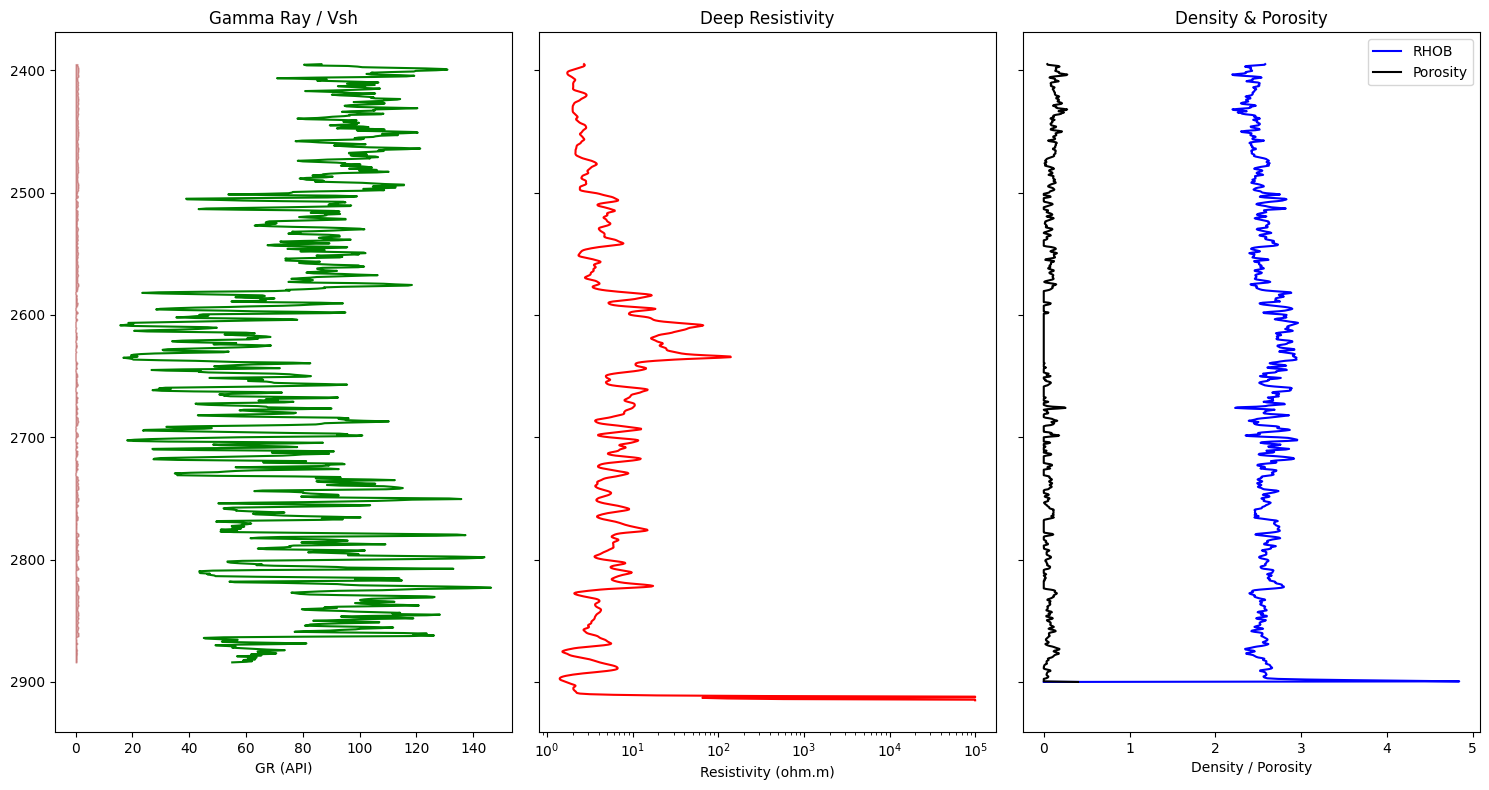

In [15]:
depth = df.index

fig, ax = plt.subplots(1, 3, figsize=(15, 8), sharey=True)

# Track 1: Gamma Ray + Vsh
ax[0].plot(df['GR'], depth, color='green')
ax[0].fill_betweenx(depth, 0, df['Vsh'], color='brown', alpha=0.4)
ax[0].invert_yaxis()
ax[0].set_xlabel('GR (API)')
ax[0].set_title('Gamma Ray / Vsh')

# Track 2: Resistivity
ax[1].semilogx(df['RILD'], depth, color='red')
ax[1].set_xlabel('Resistivity (ohm.m)')
ax[1].set_title('Deep Resistivity')

# Track 3: Density + Porosity
ax[2].plot(df['RHOB'], depth, label='RHOB', color='blue')
ax[2].plot(df['PHI_D'], depth, label='Porosity', color='black')
ax[2].set_xlabel('Density / Porosity')
ax[2].legend()
ax[2].set_title('Density & Porosity')

plt.tight_layout()
plt.show()